<a href="https://colab.research.google.com/github/EstebanmAcero/Machine_learning/blob/main/Perceptron_ejercicio_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alejandro Acero Barrera 201913513**
# **Luis Esteban Molina Acero 201910203**

# **El Perceptrón**

https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

¿Cómo ocurre la propagacion inversa por medio del gradiente descendiente? Revisar el link

Sugerencia: primero leer y entender la parte de la definición general (if __name__ == "__main__":) y despues entrar en el modelo del perceprtron (class NeuralNetwork())

Ph.D. (c) Manuel Vélez - 2020

In [ ]:
#Librerías
from numpy import exp, array, random, dot

###Definición del Perceptrón

In [ ]:
#Perceptrón
class NeuralNetwork():
    def __init__(self):
        # Inicializar la semilla del generador aleatorio para que siempre de los mismos numeros
        # cada vez que el programa corra
        random.seed(1)

        # Modelo de una sola neurona, con una conexion de salida y tres de entrada.
        # asignamos pesos aleatorios a una matriz 3 x 1, con los valores en el rango -1 a 1
        # y media 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # La función sigmoidea, que describe una función en forma de s, es la función de activación.
    # Nosotros hacemos pasar la suma de los pesos a través de dicha función para normalizarla entre 0 y 1 (porque eso es lo que esperamos) y así poder dar un resultado
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # La derivada de la función sigmoidea
    # es el gradiente descendiente de la función sigmoidea
    # Indica qué tanto "le creemos" a los pesos resultantes, revisar link.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # Entrenamos a la red neuronal a través de un proceso de prueba y error
    # Ajustamos los pesos sinápticos en cada iteración
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pasamos el conjunto de entrenamiento a través de la red neuronal (una única neurona).
            output = self.think(training_set_inputs)

            # Calculamos el error (La diferencia entre el valor que esperamos obtener realmente
            # y la salida predicha).
            error = training_set_outputs - output

            # Multiplique el error por la entrada y de nuevo por el gradiente descendiente de la función sigmoidea.
            # Esto significa que los pesos menos confiables se ajustan más (filtrado)
            # Esto significa que las entradas, que son cero, no causan cambio a los pesos.
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

            # Ajustar los pesos.
            self.synaptic_weights += adjustment

    #Proceso de aprendizaje de la red neuronal:
    def think(self, inputs):
        # Pasamos las entradas a través de la red neuronal (una única neurona).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))

###Clase Principal

In [ ]:
#Clase principal
if __name__ == "__main__":

    #Inicialice una red neuronal de una sola neurona. Quizas no sea propiamente una red...
    neural_network = NeuralNetwork()

    print ("Pesos sinapticos iniciales generados aleatoriamente: ")
    print (neural_network.synaptic_weights)

    # El conjunto de entrenamiento. Tenemos 4 ejemplos, cada uno consistente de tres valores de entrada con su respectiva salida (una salida)
    training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = array([[0, 1, 1, 0]]).T

    # Entrene a la red neuronal usando un conjunto de entrenamiento.
    # lo iteramos 10,000 veces, haciendo pequeños ajustes de pesos en cada iteración
    neural_network.train(training_set_inputs, training_set_outputs, 10000)

    print ("Nuevos pesos sinapticos después del entremaniento: ")
    print (neural_network.synaptic_weights)

    # Pruebe la red neuronal con una situacion desconocida.
    test = array([1, 0, 0])
    print ("Considerando las entradas: ")
    print (test)
    print ("---------------------------")
    print (neural_network.think(test))

Pesos sinapticos iniciales generados aleatoriamente: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Nuevos pesos sinapticos después del entremaniento: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Considerando las entradas: 
[1 0 0]
---------------------------
[0.99993704]


**Tarea**:

1.   Agregue a este código la función de normalización para que produzca una salida discreta.
2.   Agregue la tasa de aprendizaje (denotada como alfa), recuerde que es un factor multiplicativo a la hora de corregir los pesos sinápticos con el error determinado
3.  Cree una variable aparte que permita modificar el número de épocas.
4.  Agregue una gráfica el cual me permita ver la disminución del error (o la cantidad de aprendizaje) vs el número de épocas. (Como en el ejemplo de funciones de activación).

Pesos sinápticos iniciales generados aleatoriamente (sigmoide):
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Pesos sinápticos iniciales generados aleatoriamente (ReLU):
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Pesos sinápticos iniciales generados aleatoriamente (tangente hiperbólica):
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Nuevos pesos sinápticos después del entrenamiento (sigmoide):
[[ 7.26038842]
 [-0.21595726]
 [-3.41591755]]
Nuevos pesos sinápticos después del entrenamiento (ReLU):
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Nuevos pesos sinápticos después del entrenamiento (tangente hiperbólica):
[[ 2.75983647e+00]
 [-1.28624508e-07]
 [ 1.26990937e-04]]
Considerando las entradas:
[1 0 0]
Salida discreta (sigmoide):
1
Salida discreta (ReLU):
0
Salida discreta (tangente hiperbólica):
1


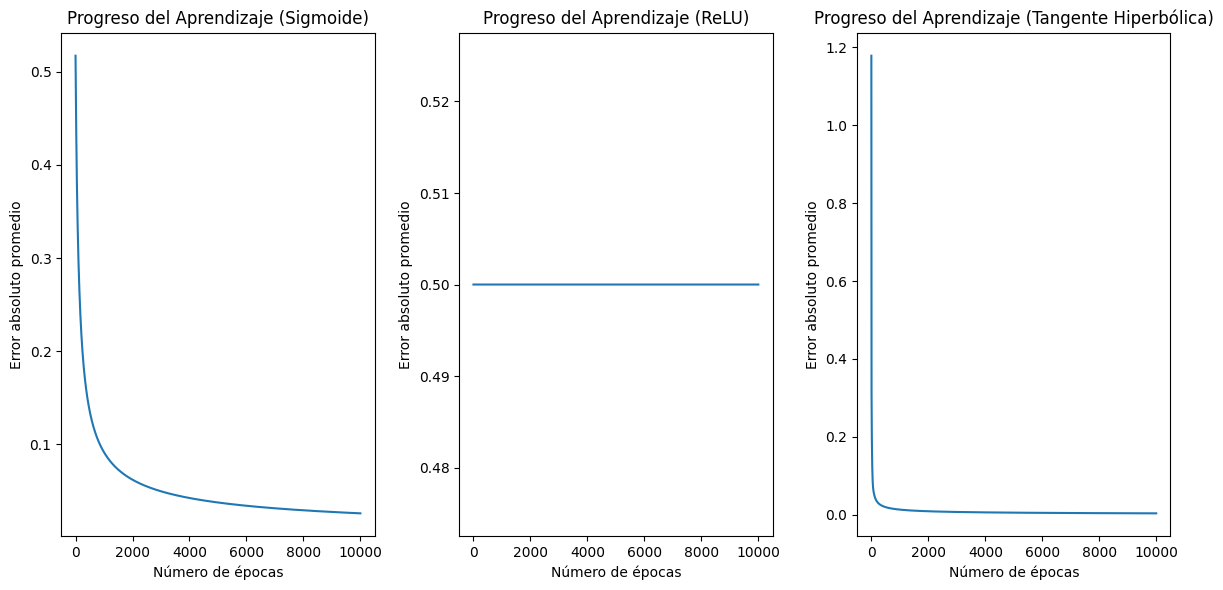

In [ ]:
import random
from numpy import dot, exp, array, random, maximum

class NeuralNetwork:
    def __init__(self, activation_func='sigmoid'):
        random.seed(1)
        self.synaptic_weights = 2 * random.random((3, 1)) - 1
        self.activation_func = activation_func

    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    def __relu(self, x):
        return maximum(0, x)

    def __relu_derivative(self, x):
        return (x > 0).astype(int)

    def __tanh(self, x):
        return (exp(x) - exp(-x)) / (exp(x) + exp(-x))

    def __tanh_derivative(self, x):
        return 1 - x**2

    def activate(self, x):
        if self.activation_func == 'sigmoid':
            return self.__sigmoid(x)
        elif self.activation_func == 'relu':
            return self.__relu(x)
        elif self.activation_func == 'tanh':
            return self.__tanh(x)

    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations, learning_rate):
        errors = []  # Lista para almacenar errores en cada época
        for iteration in range(number_of_training_iterations):
            output = self.think(training_set_inputs)
            error = training_set_outputs - output
            errors.append(abs(error).mean())  # Almacena el error absoluto promedio

            if self.activation_func == 'sigmoid':
                adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))
            elif self.activation_func == 'relu':
                adjustment = dot(training_set_inputs.T, error * self.__relu_derivative(output))
            elif self.activation_func == 'tanh':
                adjustment = dot(training_set_inputs.T, error * self.__tanh_derivative(output))

            self.synaptic_weights += learning_rate * adjustment

        return errors  # Devuelve la lista de errores por época

    def think(self, inputs):
        return self.activate(dot(inputs, self.synaptic_weights))

neural_network_sigmoid = NeuralNetwork(activation_func='sigmoid')
neural_network_relu = NeuralNetwork(activation_func='relu')
neural_network_tanh = NeuralNetwork(activation_func='tanh')

print("Pesos sinápticos iniciales generados aleatoriamente (sigmoide):")
print(neural_network_sigmoid.synaptic_weights)

print("Pesos sinápticos iniciales generados aleatoriamente (ReLU):")
print(neural_network_relu.synaptic_weights)

print("Pesos sinápticos iniciales generados aleatoriamente (tangente hiperbólica):")
print(neural_network_tanh.synaptic_weights)

training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

learning_rate = 0.1  # Tasa de aprendizaje
num_epochs = 10000   # Número de épocas

errors_sigmoid = neural_network_sigmoid.train(training_set_inputs, training_set_outputs, num_epochs, learning_rate)
errors_relu = neural_network_relu.train(training_set_inputs, training_set_outputs, num_epochs, learning_rate)
errors_tanh = neural_network_tanh.train(training_set_inputs, training_set_outputs, num_epochs, learning_rate)

print("Nuevos pesos sinápticos después del entrenamiento (sigmoide):")
print(neural_network_sigmoid.synaptic_weights)

print("Nuevos pesos sinápticos después del entrenamiento (ReLU):")
print(neural_network_relu.synaptic_weights)

print("Nuevos pesos sinápticos después del entrenamiento (tangente hiperbólica):")
print(neural_network_tanh.synaptic_weights)

test = array([1, 0, 0])
print("Considerando las entradas:")
print(test)

print("Salida discreta (sigmoide):")
if neural_network_sigmoid.think(test) >= 0.5:
    print(1)
else:
    print(0)

print("Salida discreta (ReLU):")
if neural_network_relu.think(test) >= 0.5:
    print(1)
else:
    print(0)

print("Salida discreta (tangente hiperbólica):")
if neural_network_tanh.think(test) >= 0.5:
    print(1)
else:
    print(0)

# Gráficas de disminución del error vs número de épocas
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(range(num_epochs), errors_sigmoid)
plt.xlabel('Número de épocas')
plt.ylabel('Error absoluto promedio')
plt.title('Progreso del Aprendizaje (Sigmoide)')

plt.subplot(132)
plt.plot(range(num_epochs), errors_relu)
plt.xlabel('Número de épocas')
plt.ylabel('Error absoluto promedio')
plt.title('Progreso del Aprendizaje (ReLU)')

plt.subplot(133)
plt.plot(range(num_epochs), errors_tanh)
plt.xlabel('Número de épocas')
plt.ylabel('Error absoluto promedio')
plt.title('Progreso del Aprendizaje (Tangente Hiperbólica)')

plt.tight_layout()
plt.show()


<ipython-input-8-5fb25d329e16>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 6))


KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x792ce24f1990> (for post_execute):


KeyboardInterrupt: ignored

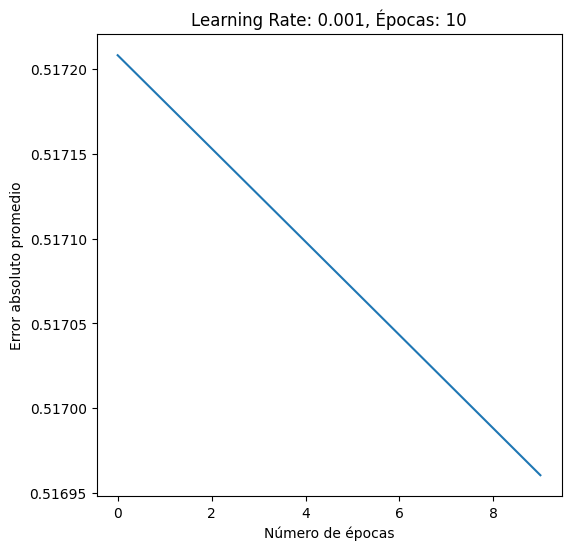

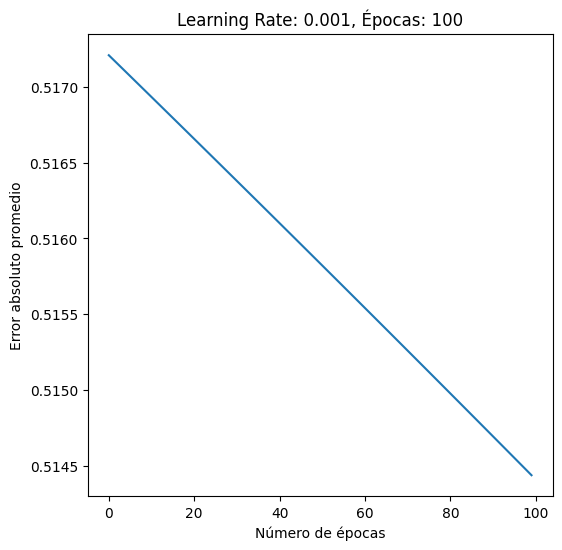

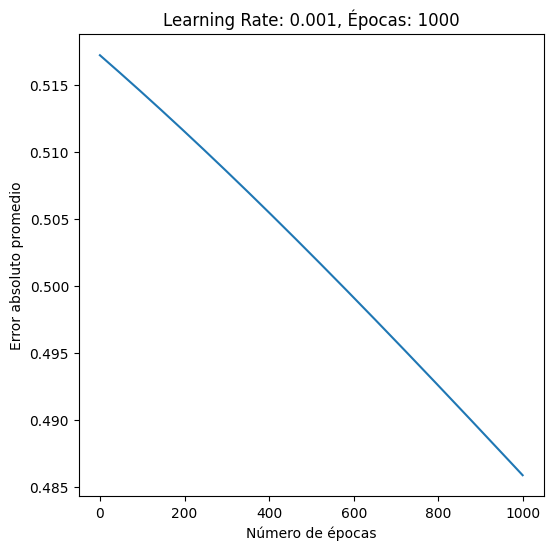

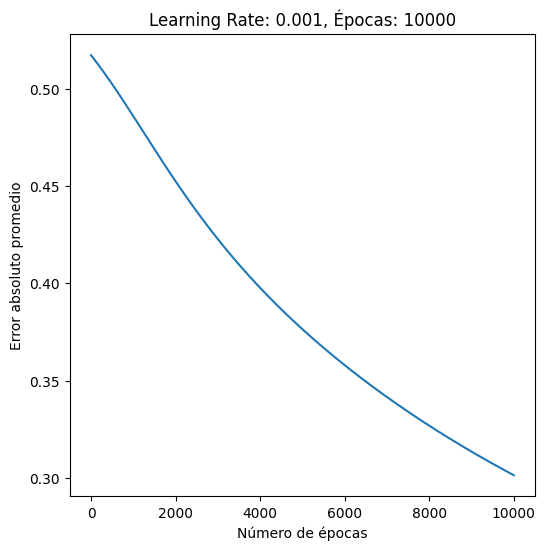

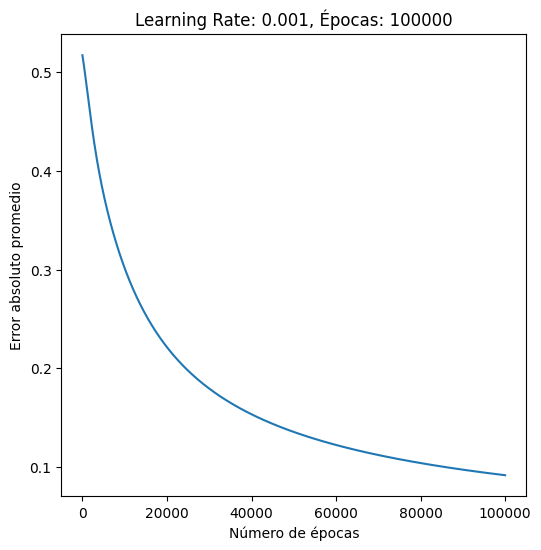

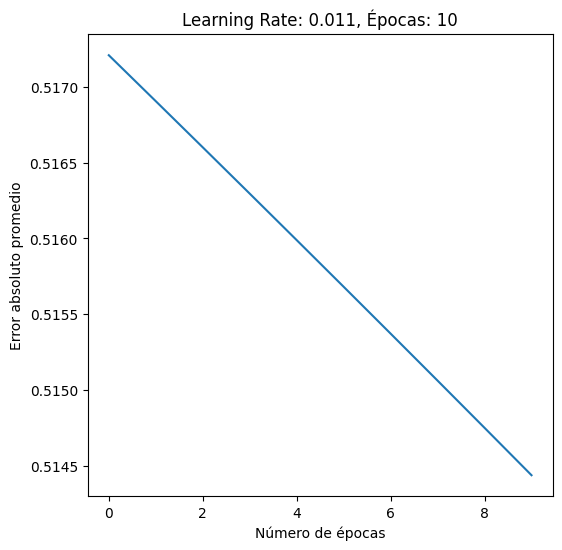

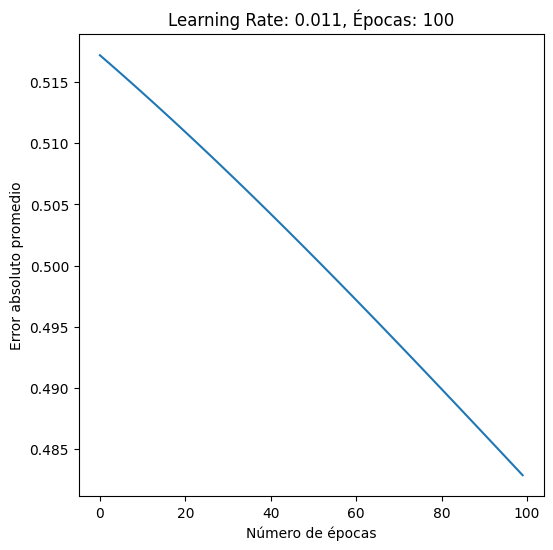

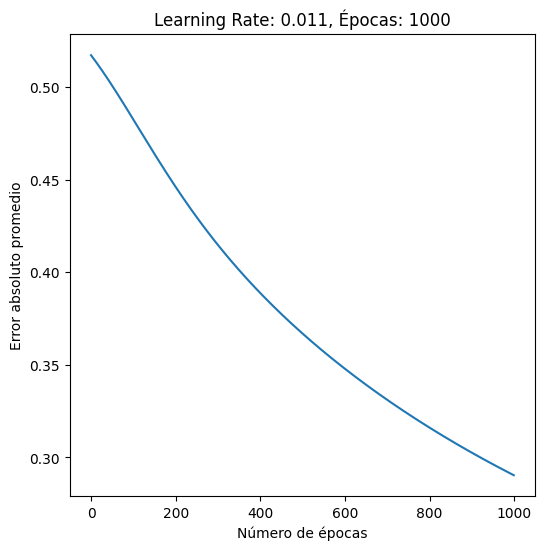

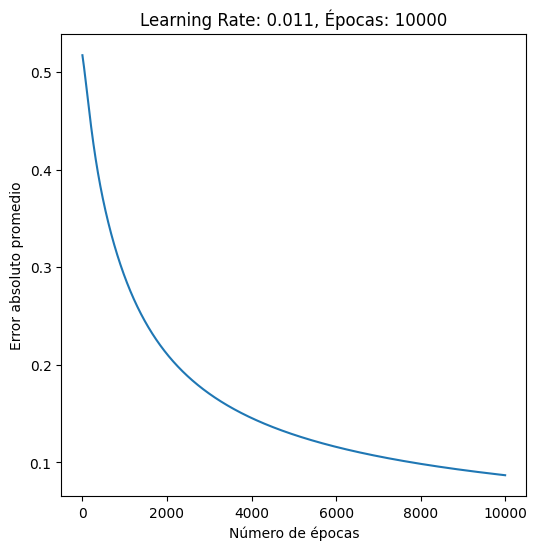

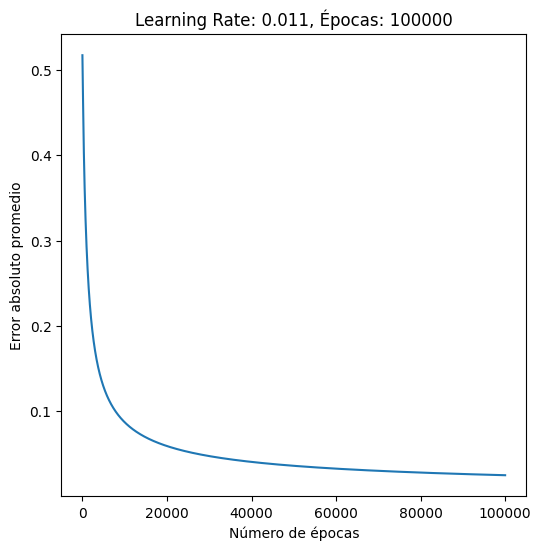

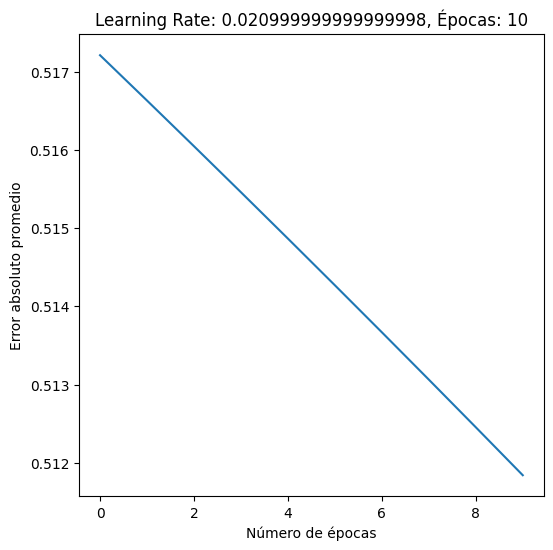

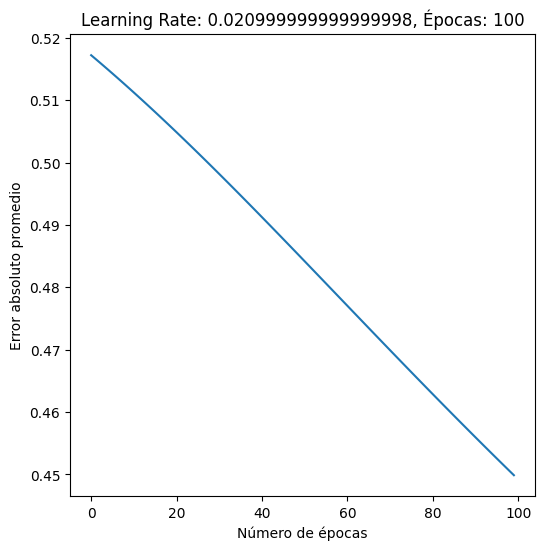

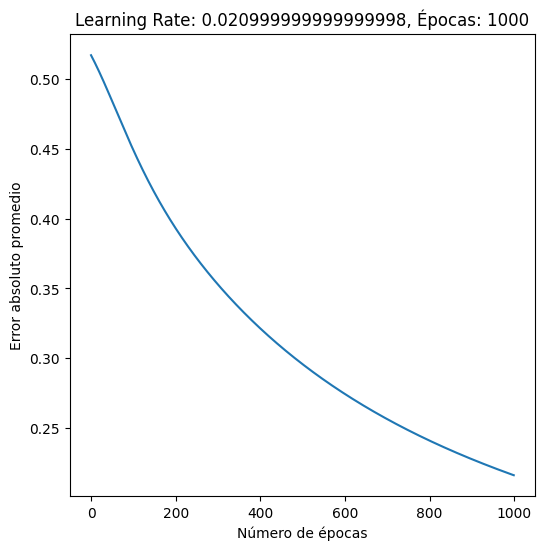

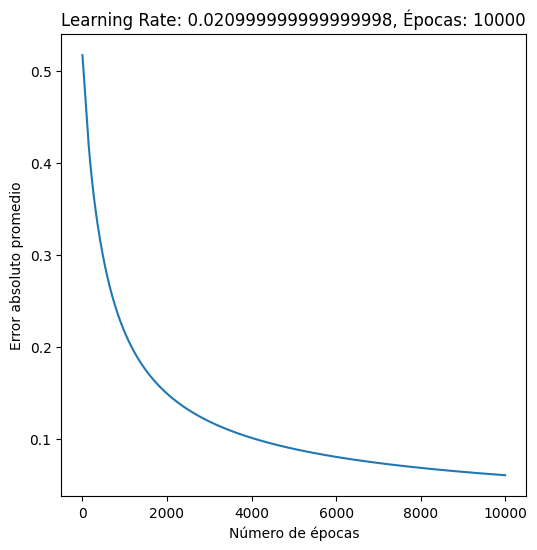

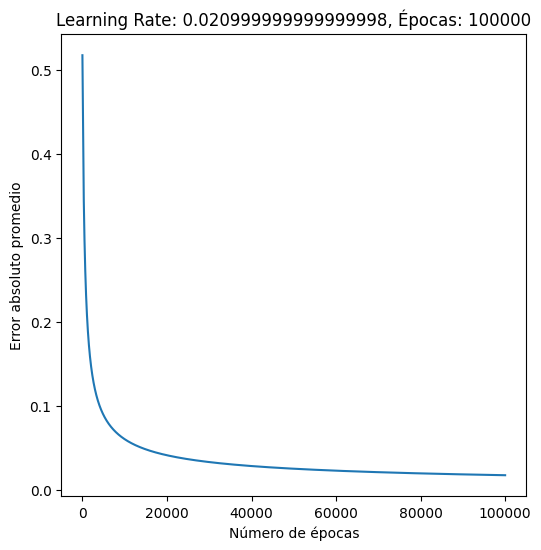

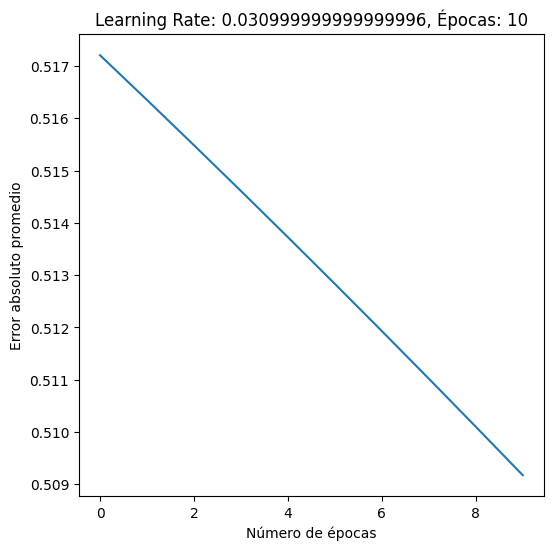

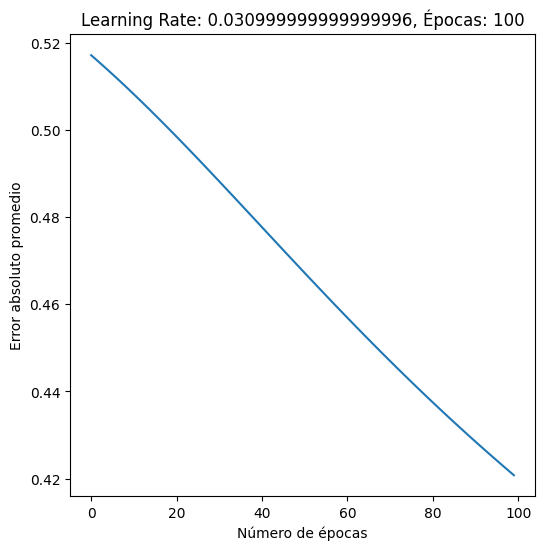

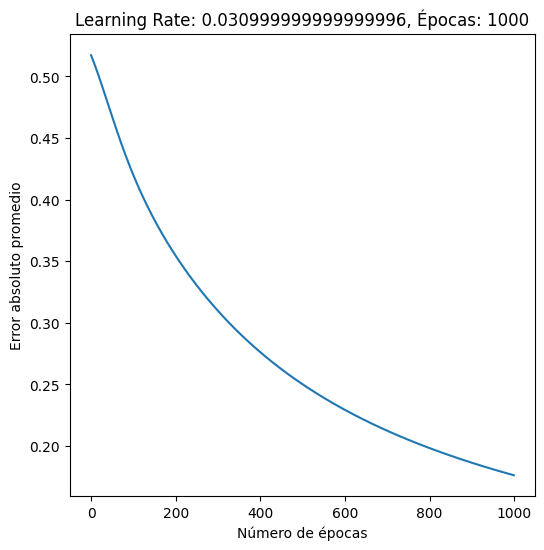

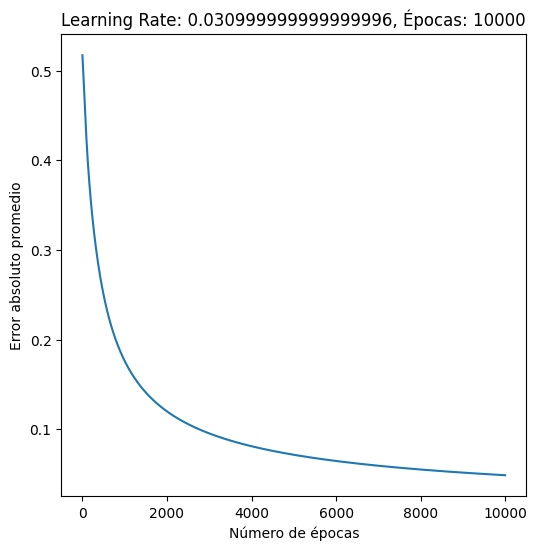

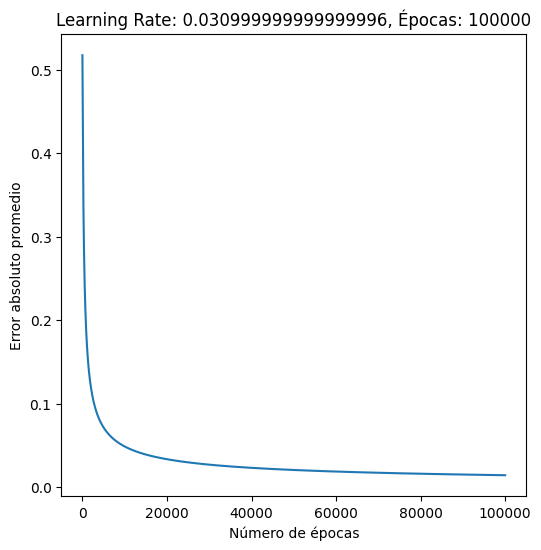

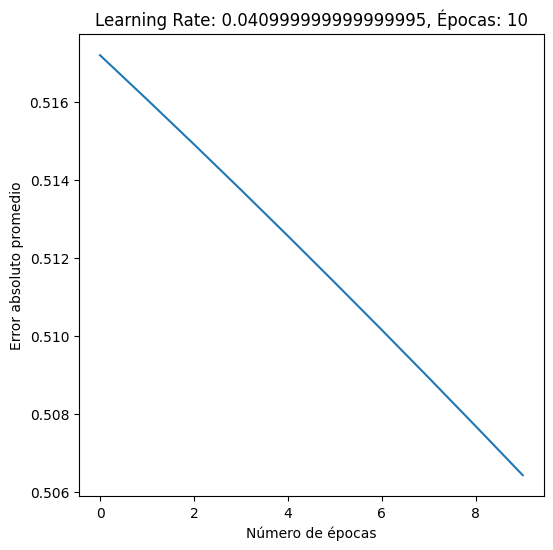

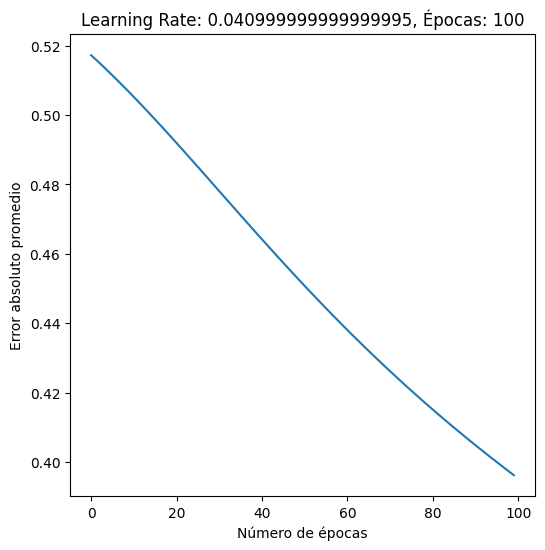

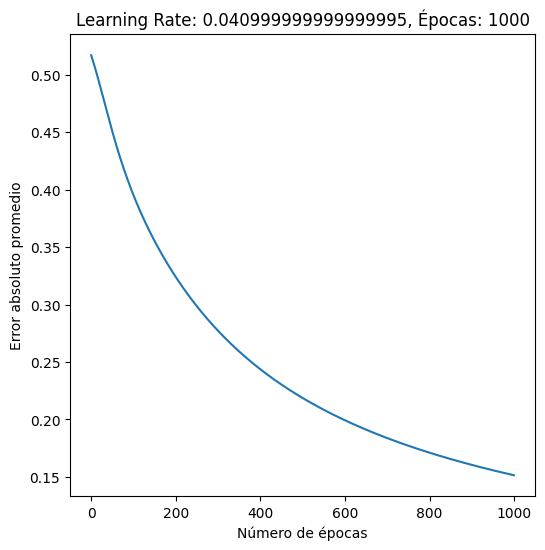

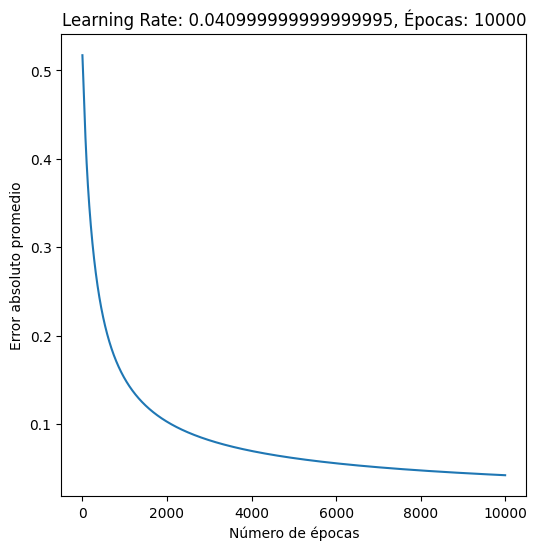

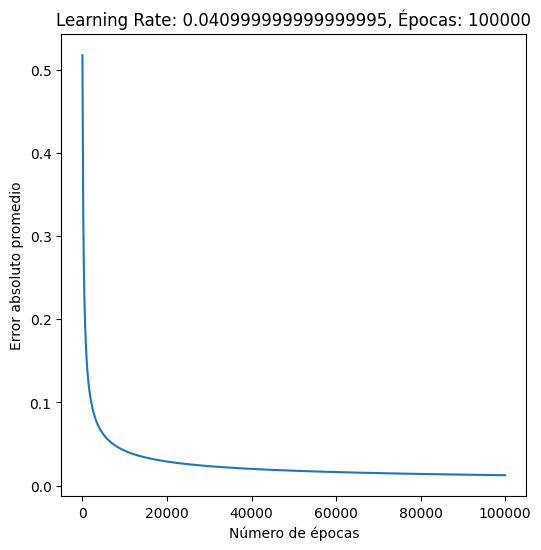

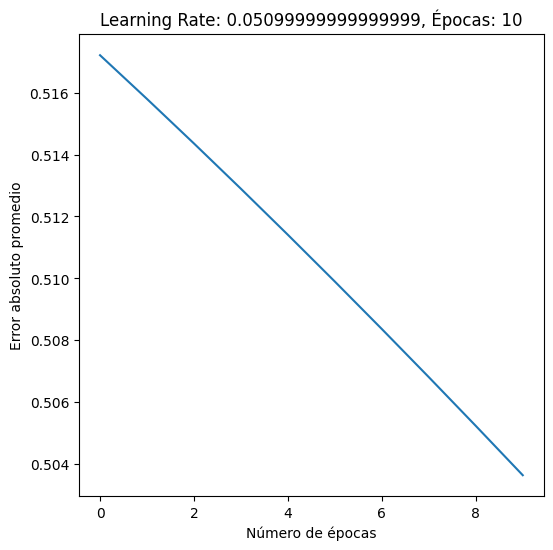

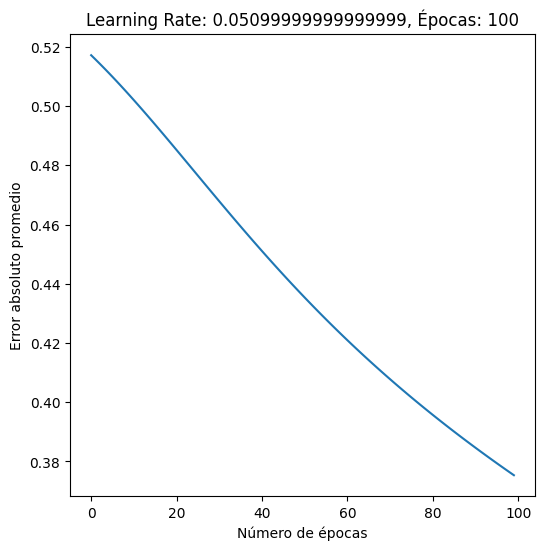

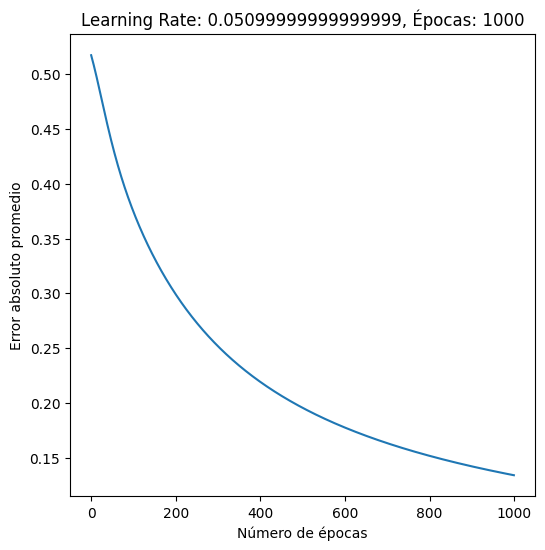

In [ ]:
import numpy as np

# Definir el rango de learning_rate y número de épocas en potencias de 10
learning_rates = np.arange(0.01, 0.10, 0.01)
num_epochs_powers_of_10 = [10**i for i in range(1, 6)]

# Crear una lista para almacenar todas las gráficas
all_plots = []

for learning_rate in learning_rates:
    for num_epochs in num_epochs_powers_of_10:
        # Crear una nueva red neuronal con los hiperparámetros actuales
        neural_network = NeuralNetwork(activation_func='sigmoid')

        # Entrenar la red neuronal
        errors = neural_network.train(training_set_inputs, training_set_outputs, num_epochs, learning_rate)

        # Generar una gráfica de disminución del error
        plt.figure(figsize=(6, 6))
        plt.plot(range(num_epochs), errors)
        plt.xlabel('Número de épocas')
        plt.ylabel('Error absoluto promedio')
        plt.title(f'Learning Rate: {learning_rate}, Épocas: {num_epochs}')
        all_plots.append(plt)

# Mostrar todas las gráficas
for i, plot in enumerate(all_plots):
    plt.figure(i)
    plt.show()
